In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

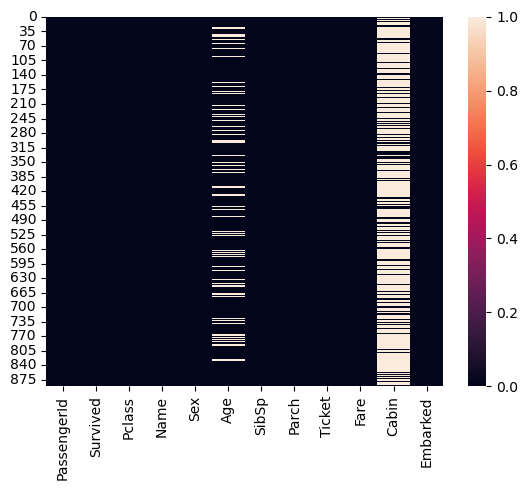

In [58]:
sns.heatmap(titanic.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

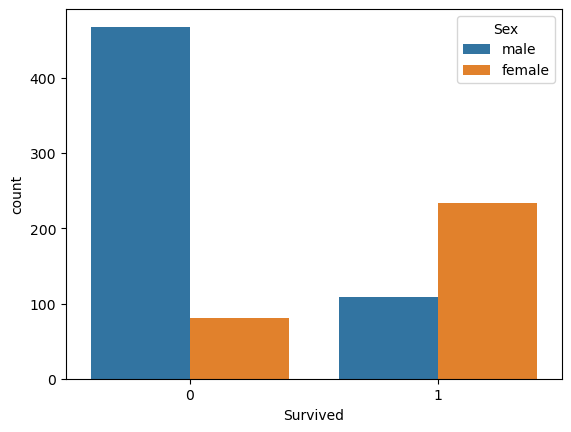

In [59]:
sns.countplot(x='Survived', data=titanic, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

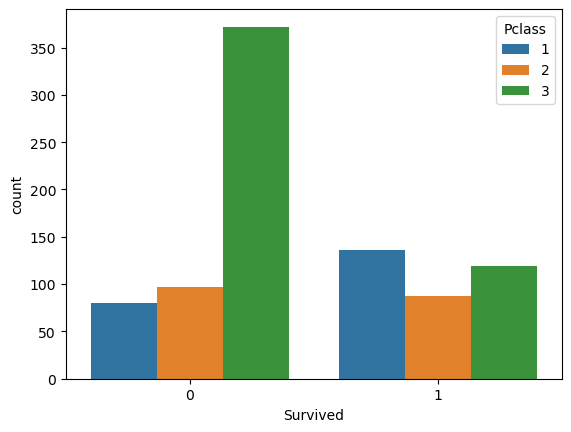

In [60]:
sns.countplot(x='Survived', data=titanic, hue='Pclass')

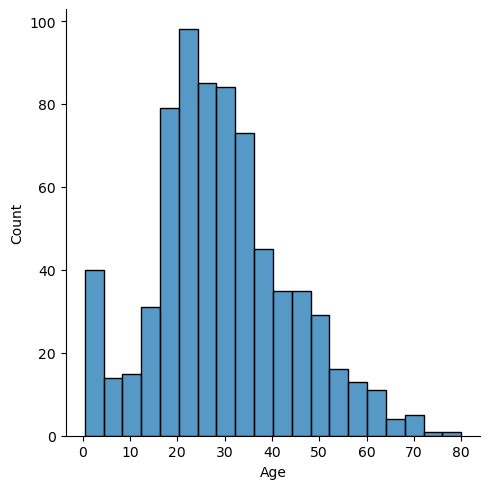

In [63]:
sns.displot(titanic['Age'].dropna())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

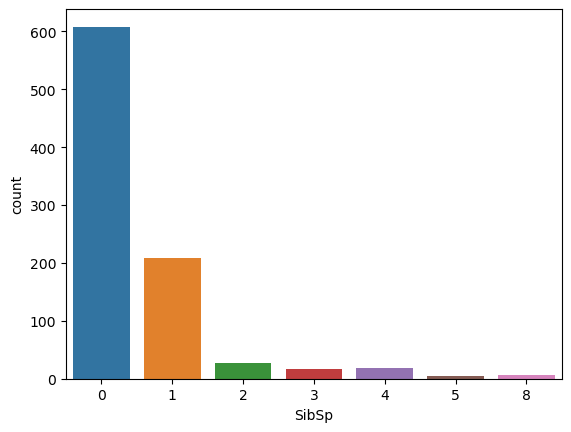

In [65]:
sns.countplot(x='SibSp', data=titanic)

<AxesSubplot:xlabel='Parch', ylabel='count'>

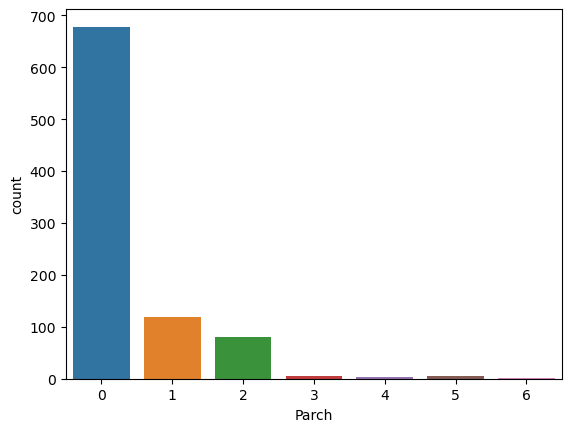

In [66]:
sns.countplot(x='Parch', data=titanic)

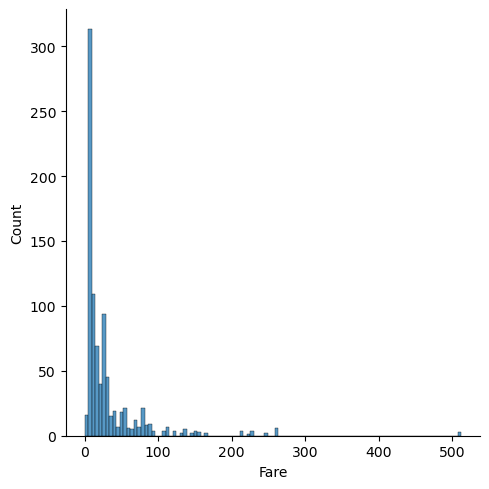

In [67]:
sns.displot(titanic['Fare'].dropna())

In [68]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

S: Southampton, England
C: Cherbourg, France
Q: Queenstown (now known as Cobh), Ireland

In [41]:
titanic["Embarked"].fillna('S', inplace=True)

In [5]:
titanic["Embarked"] = titanic["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [6]:
titanic["Embarked"]

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [43]:
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

In [44]:
titanic["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [45]:
# Feature engineering: create a new feature "FamilySize"
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

In [46]:
# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"]
X = titanic[features]
y = titanic["Survived"]

In [47]:
# Standardize the features
scaler = StandardScaler() # z = (x - mean) / standard_deviation
X = scaler.fit_transform(X)

In [48]:
# Split the dataset into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Create a logistic regression model
logreg = LogisticRegression()

In [50]:
# Train the model using the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Make predictions on the testing data
y_pred = logreg.predict(X_test)

In [52]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8097014925373134


In [53]:
# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[137  20]
 [ 31  80]]


In [54]:
# Print the classification report (precision, recall, F1-score, etc.)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

